In [1]:
# load libraries
import numpy as np
import pandas as pd
import geopandas as gpd

In [2]:
csv_path = '/home/h6x/git_projects/universal-experiment-lab/experiment_1/data/shape/mortality.gdb'

# Read the csv file making sure the FIPS code is read as a string
mortality_df = gpd.read_file(csv_path)

In [3]:
mortality_df.head()

,ST_ABB,PRIS_20,MOR_14,MOR_15,MOR_16,MOR_17,MOR_18,MOR_19,MOR_20,STCNTY,...,EP_DISABL,EP_SNGPNT,EP_LIMENG,EP_MINRTY,EP_MUNIT,EP_MOBILE,EP_CROWD,EP_NOVEH,EP_GROUPQ,geometry
0,AL,25.811884,17.750258,14.483320,18.978805,12.491694,16.126418,14.410135,12.700370,01001,...,19.3,7.5,0.8,25.0,3.8,18.4,1.4,5.6,1.0,"POLYGON ((-86.92120 32.65754, -86.92035 32.658..."
1,AL,17.801299,27.863777,23.596420,24.662813,16.013289,19.367909,18.606492,22.441430,01003,...,14.0,5.7,0.5,17.0,18.3,11.7,1.3,3.4,1.4,"POLYGON ((-88.02858 30.22676, -88.02399 30.230..."
2,AL,7.649747,13.828689,10.984540,14.161850,9.833887,11.507293,11.638955,10.234279,01005,...,22.2,12.8,1.6,53.9,1.3,29.2,3.4,9.2,11.2,"POLYGON ((-85.74803 31.61918, -85.74543 31.618..."
3,AL,8.130864,27.038184,20.829943,30.443160,20.398671,26.012966,22.486144,22.379778,01007,...,16.7,6.0,0.3,25.4,2.4,28.5,0.8,6.0,9.3,"POLYGON ((-87.42194 33.00338, -87.31854 33.006..."
4,AL,7.649747,28.482972,22.701383,30.539499,23.920266,23.419773,23.198733,20.468557,01009,...,14.2,7.0,1.7,12.9,0.9,25.2,1.6,4.2,0.9,"POLYGON ((-86.96336 33.85822, -86.95967 33.857..."


In [4]:
mortality_df.shape

(3221, 26)

In [6]:
# get unique states
states = mortality_df['ST_ABB'].unique()

In [7]:
# for each state count the number of rows and save it in a df with the state as the index
state_counts = pd.DataFrame(index=states, columns=['count'])

for state in states:
    state_counts.loc[state, 'count'] = mortality_df[mortality_df['ST_ABB'] == state].shape[0]

In [8]:
state_counts

,count
AL,67
AK,30
AZ,15
AR,75
CA,58
CO,64
CT,8
DE,3
DC,1
FL,67


(array([2., 2., 1., 1., 0., 4., 1., 1., 1., 1., 0., 2., 1., 1., 0., 1., 1.,
        1., 0., 0., 1., 2., 1., 0., 3., 1., 3., 0., 1., 1., 2., 0., 2., 1.,
        1., 1., 1., 1., 1., 2., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0.,
        0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([  1.  ,   3.53,   6.06,   8.59,  11.12,  13.65,  16.18,  18.71,
         21.24,  23.77,  26.3 ,  28.83,  31.36,  33.89,  36.42,  38.95,
         41.48,  44.01,  46.54,  49.07,  51.6 ,  54.13,  56.66,  59.19,
         61.72,  64.25,  66.78,  69.31,  71.84,  74.37,  76.9 ,  79.43,
         81.96,  84.49,  87.02,  89.55,  92.08,  94.61,  97.14,  99.67,
        102.2 , 104.73, 107.26, 109.79, 112.32, 114.85, 117.38, 119.91,
        122.44, 124.97, 127.5 , 130.03, 132.56, 135.09, 137.62, 140.15,
        142.68, 145.21, 147.74, 150.27, 152.8 

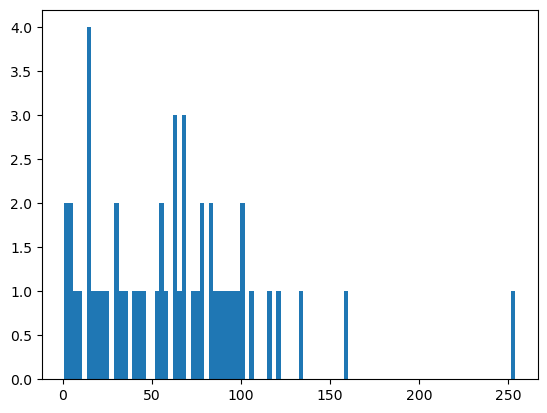

In [12]:
# PLOT A HISTORYGRAM
import matplotlib.pyplot as plt

plt.hist(state_counts['count'], bins=100)